# Sentiment Analysis for Tweets using Naive Bayes

In this exercise we will try to classify the sentiment (Stimmung) of different Tweets using the Naive Bayes classifier from the lecture. The goal for us is to predict if a Tweet has a positive or a negative sentiment.

**Setting**: Given a Tweet, classify if it has a positive or negative sentiment.

This is for example useful to 
- decide if we want to invest in a particular company based on Tweets about the companies performance
- decide if we want to watch a particular movie based on reviews

**Outline**:
1. Recall Bayes' rule from the lecture
2. Download the dataset
3. Preprocess the dataset
4. Extract features
5. Implement the Naive Bayes Classifier
6. Test the Classifier

## Naive Bayes Classifier
This is a simple (naive) classification method based on Bayes' rule. It relies on a very simple representation of the document (called the bag of words representation).

Imagine we have 2 classes (positive and negative) and our input is a text representing a review of a movie. We want to know whether the review was positive or negative. So we may have a bag of positive words (e.g. love, amazing,hilarious, great), and a bag of negative words (e.g. hate, terrible).


We may then count the number of times each of those words appears in the document, in order to classify the document as positive or negative.

This technique works well for topic classification; say we have a set of academic papers, and we want to classify them into different topics (computer science, biology, mathematics).

### Bayes’ Rule Applied to Tweets and Classes

Bayes' rule in our lecture:

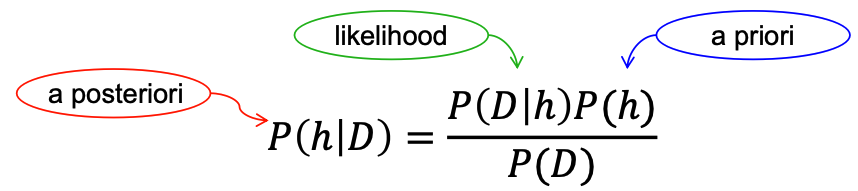

Bayes' rule for sentiment analysis:
$$P(C|W) = \frac{P(W|C) P(C)} {P(W)}$$
- $P(C)$: A priori probability - Class probability
- $P(W|C)$: Likelihood - Probability of a Tweet (sequence of words) given the class
- $P(C|W)$: A posteriori probability - Probability of a class given a Tweet (sequence of words)
- $P(W)$: Marginal probability - Probability of the Tweet (sequence of words) occuring
- $W$ corresponds to a Tweet (sequence of words)
  - $W_i$ to individual words
- $C$ corresponds to the class/sentiment (positive/negative)

**What do we mean by the term $P(W|C)$?**

Let’s represent the Tweet as a set of features (words or tokens) $\{W_1, W_2, W_3, \ldots \}$

We can then re-write $P(W|C)$ as:
$$P(W|C) = P(W_1, W_2, W_3, …, W_n|C)$$

**Do we need $P(W)$?**

$P(W)$ is the marginal probability of a Tweet (sequence of words).

This means, that we would need to calculate the probability of each Tweet occuring based on the words in the Tweet.

**Since the denominator $P(W)$ is constant for calculating the probability for the positive $C=pos$ and negative $C=neg$ class, we can ignore an skip its calculation.**

$$P(C|W) \sim P(W|C) P(C)$$

### Maximum a Posteriori (MAP) Hypothesis
$$c = \underset{c \in C}{\mathrm{argmax}} P(C=c|W) = \underset{c \in C}{\mathrm{argmax}} P(W|C=c)  P(C=c) $$

## Implement Sentiment Analysis

### Install Dependencies
#### Natural Language Toolkit
NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.


In [ ]:
!pip install numpy
!pip install nltk

### Import Dependencies

In [ ]:
import numpy as np
import nltk
from nltk.corpus import twitter_samples

### Import the Data
Download the sample Tweets from the NLTK package:

In [ ]:
nltk.download('twitter_samples')

This will import three datasets from NLTK that contain various Tweets to train and test the model:

* negative_tweets.json: 5000 Tweets with negative sentiments
* positive_tweets.json: 5000 Tweets with positive sentiments
* tweets.20150430-223406.json: 20000 Tweets with no sentiments

Next, partition the data in a training and test dataset.

In [ ]:
# get the sets of positive and negative Tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# split the data into two pieces, one for training and one for testing (validation set)
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

# avoid assumptions about the length of all_positive_tweets
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

### Process the Data
For any machine learning project, once you've gathered the data, the first step is to process the data to make useful inputs for your model.

1. Eliminate handles and URLs
2. Tokenize the string into words. 
3. Remove stop words like "and, is, a, on, etc."
4. Stemming- or convert every word to its stem. Like dancer, dancing, danced, becomes 'danc'. You can use porter stemmer to take care of this. 
5. Convert all the words to lower case. 

#### Download the Necessary Packages

In [ ]:
nltk.download('punkt') # This tokenizer divides a text into a list of sentences
nltk.download('stopwords')


#### Import Libraries for Processing

In [ ]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

#### NLTK Tokenization
Tokenization is the process by which a large quantity of text is divided into smaller parts called tokens. These tokens are very useful for find patterns and are considered as a base step for stemming and lemmatization.

In [ ]:
sentence = """At eight o'clock on Thursday morning ... Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
print(tokens)

#### NLTK Stopword List
So stopwords are words that are very common in human language but are generally not useful because they represent particularly common words such as “the”, “of”, and “to”.

In [ ]:
stopwords_english = stopwords.words('english')
tokens_without_stopwords = [token for token in tokens if token not in stopwords_english]
print(tokens_without_stopwords)

#### Define the Processing Pipeline

In [ ]:
def process_tweet(tweet):
    '''
    Input:
        tweet: a string containing a Tweet
    Output:
        tweets_clean: a list of words containing the processed Tweet
    '''
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize Tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

#### Test the Processing Pipeline

In [ ]:
custom_tweet = test_pos[5]
print(custom_tweet)
print(process_tweet(custom_tweet))

### Feature Extraction

**Feature extraction** refers to the process of transforming raw data into numerical features that can be processed while preserving the information in the original dataset. It yields better results than applying machine learning directly on the raw data.

What would be your guess as to which features are suitable to represent text documents? 

* Assign a real number to each word in the English dictionary and replace each text with the corresponding number. 
* Create a list of possible words and compare it with the words in each of your texts. You will end up with a feature vector with zeros and ones whose size corresponds to the number of possible words.
* Count how many times each word from the texts occurs in each category (positive and negative), and then add these numbers for each of your texts in each category.  



#### Feature Extraction using Word Frequencies
You have to encode each tweet as a 3-dimesional vector (word | pos. frequ.| neg. freq.). To do so, you have to create a dictionary to map the word, and the class it appeared in (positive or negative) to the number of times that word appeared in its corresponding class.

In [ ]:
tweets = ['i am happy', 'i am tricked', 'i am sad', 'i am tired', 'i am tired']
ys = [1, 0, 0, 0, 0]  # Class labels for each Tweet

In [ ]:
def count_tweets(tweets, ys):
    '''
    Input:
        tweets: a list of Tweets
        ys: a list corresponding to the sentiment of each Tweet (either 0 or 1)
    Output:
        result: a dictionary mapping each pair to its frequency
    '''
    freqs = {}
    for y, tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            # define the key, which is the word and label tuple
            pair = (word,y)

            # if the key exists in the dictionary, increment the count
            if pair in freqs:
                freqs[pair] += 1

            # if the key is new, add it to the dictionary and set the count to 1
            else:
                freqs[pair] = 1
    return freqs

In [ ]:
freqs = count_tweets(tweets, ys)
print(freqs)

| Vocabulary  | PosFreq  | NegFreq  |
|---|---|---|
| happi   | 1  | 0  |
| trick | 0  | 1  |
|  sad |  0 |  1 |
|  tire | 0  | 2  |

Define a `lookup` function to get the positive frequencies and the negative frequencies for a specific word.

In [ ]:
def lookup(freqs, word, label):
    '''
    Input:
        freqs: a dictionary with the frequency of each pair (or tuple)
        word: the word to look up
        label: the label corresponding to the word
    Output:
        n: the number of times the word with its corresponding label appears.
    '''
    return freqs.get((word, label), 0)

In [ ]:
word = 'happi'
label = 1
lookup(freqs, word, label)

### Naive Bayes Classificiation:
$$c = \underset{c \in C}{\mathrm{argmax}} P(C=c|W) = \underset{c \in C}{\mathrm{argmax}} P(W|C=c)  P(C=c) $$
$$c = \underset{c \in C}{\mathrm{argmax}} P(W_1, ..., W_m|C=c)  P(C=c) $$
Naive Bayes assumption: Features are conditionally indepentent
$$c = \underset{c \in C}{\mathrm{argmax}} P(c) \prod_{i}^m P(W_{i}|c)\tag{3}$$

To do inference, you can compute the following: 
$$\frac {P(c_{pos})}{P(c_{neg})} \prod_{i}^m \frac {P(W_{i}|c_{pos})}{ P(W_{i}|c_{neg})} > 1 $$

As $m$ gets larger, we can get numerical under-/overflow issues, because we multiply a lot of numbers smaller than 1. Therefore we introduce the $\log$ function, which prevents the under-/overflow isssue.

$$\log \frac {P(c_{pos})}{P(c_{neg})} + \sum_{i}^m  \log \frac {P(W_{i}|c_{pos})}{ P(W_{i}|c_{neg})} > 0$$

#### Calculating the Prior and Logprior for the Classifier:
The prior probability represents the underlying probability that a Tweet is positive versus negative. In other words, if we had no specific information and blindly picked a Tweet out of the population set, what is the probability that it will be positive versus that it will be negative? That is the "prior".


To train a Naive Bayes classifier:
- The first part of training a naive bayes classifier is to identify the number of classes that you have.
- You will create a probability for each class.
$P(c_{pos})$ is the probability that the document is positive.
$P(c_{neg})$ is the probability that the document is negative.
Use the formulas as follows and store the values in a dictionary:

$$P(c_{pos}) = \frac{n_{pos}}{n_{pos} + n_{neg}}\tag{1}$$

$$P(c_{neg}) = \frac{n_{neg}}{n_{pos} + n_{neg}}\tag{2}$$

Where $n_{neg}$ and $n_{pos}$ refer to the number of negative and positive Tweets.

Calculate the prior for the classifier.

In [ ]:
n_pos = np.sum(train_y > 0)
n_neg = np.sum(train_y <= 0)

# Calculate c_pos, the probability of a positive Tweet
c_pos = n_pos / (n_pos + n_neg)
print(f"a priori P(c_pos) = {c_pos}")
# Calculate c_neg, the probability of a negative Tweet
c_neg = n_neg / (n_pos + n_neg)
print(f"a priori P(c_neg) = {c_neg}")

$$  \text{Logprior} =  \log \frac {P(c_{pos})}{P(c_{neg})} = \log(P(c_{pos})) - \log(P(c_{neg}))  $$

Calculate the logprior for the classifier.

In [ ]:
logprior = np.log(c_pos) - np.log(c_neg)
print("logprior = %0.2f" %(logprior))

#### Calculating the (Log)Likelihood - Positive and Negative Probability of a Word
To compute the positive probability and the negative probability for a specific word in the vocabulary, we only need the frequency of the word occuring in the tweets of the positive/negative class and divide it by the total number of words in the tweets of the positive/negative class.

$$P(W=w|C=c_{pos}) = \frac{freq_{pos}}{n_{pos}}\tag{4} $$
$$P(W=w|C=c_{neg}) = \frac{freq_{neg}}{n_{neg}}\tag{5} $$

- $freq_{pos}$ and $freq_{neg}$ are the frequencies of that specific word in the positive or negative class. In other words, the positive frequency of a word is the number of times the word is counted with the label of 1.
- $n_{pos}$ and $n_{neg}$ are the total number of positive and negative words for all documents (for all tweets), respectively.

**Problem**: These probabilities can become zero! If this happens, the logarithm will become -infinity. To prevent this, we need to smooth these probabilities with [additive/Laplace smoothing](https://en.wikipedia.org/wiki/Additive_smoothing). Consequently probabilities can never become completely zero.


$$P(W=w|C=c_{pos}) = \frac{freq_{pos} + 1}{n_{pos} + v}\tag{4} $$
$$P(W=w|C=c_{neg}) = \frac{freq_{neg} + 1}{n_{neg} + v}\tag{5} $$

- $v$ is the number of unique words in the entire set of documents, for all classes, whether positive or negative.

##### Get the Frequency of each Word
- Given your `count_tweets` function, you can compute a dictionary called `freqs` that contains all the frequencies.
- In this `freqs` dictionary, the key is the tuple (word, label)
- The value is the number of times the word has appeared.

In [ ]:
# Build the freqs dictionary for later uses
freqs = count_tweets(train_x, train_y)

##### Get the Number of Unique Words
You can compute the number of unique words that appear in the `freqs` dictionary to get $v$

In [ ]:
# calculate v, the number of unique words in the vocabulary
vocab = set([pair[0] for pair in freqs.keys()])
v = len(vocab)
print(f"The number of unique words in the vocabulary: {v}")

##### Get the Total Number of Positive and Negative Words
Using `freqs` dictionary, you can also compute the total number of positive words and total number of negative words. 


In [ ]:
# calculate n_pos and n_neg
n_pos = n_neg = 0
for pair in freqs.keys():
    # if the label is positive (greater than zero)
    if pair[1] > 0:

        # Increment the number of positive words by the count for this (word, label) pair
        n_pos += freqs[pair]

    # else, the label is negative
    else:

        # increment the number of negative words by the count for this (word,label) pair
        n_neg += freqs[pair]

print(f"n_pos = {n_pos}")
print(f"n_neg = {n_neg}")

##### Calculate the Conditional Word Probabilities
You can iterate over each word in the vocabulary, use your `lookup` function to get the positive frequencies, $freq_{pos}$, and the negative frequencies, $freq_{neg}$, for that specific word.
Compute the positive probability of each word $P(w_{pos})$, negative probability of each word $P(w_{neg})$ using equations 4 & 5.

$$P(W=w|C=c_{pos}) =  P(w_{pos}) = \frac{freq_{pos} + 1}{n_{pos} + v}\tag{4} $$
$$P(W=w|C=c_{neg}) = P(w_{neg}) = \frac{freq_{neg} + 1}{n_{neg} + v}\tag{5} $$

Now we are able to calculate the log likelihood of a specific word
$$log \left( \frac{P(w_{pos})}{P(w_{neg})} \right)$$

In [ ]:
# the log likelihood of you Naive bayes equation
loglikelihood = {}
# For each word in the vocabulary...
for word in vocab:
    # get the positive and negative frequency of the word
    freq_pos = lookup(freqs,word, 1)
    freq_neg = lookup(freqs,word, 0)

    # calculate the probability that each word is positive, and negative
    p_w_pos = (freq_pos + 1) / (n_pos + v)
    p_w_neg = (freq_neg + 1) / (n_neg + v)
    
    # calculate the log likelihood of the word
    loglikelihood[word] = np.log(p_w_pos/p_w_neg)

## Implement the Naive Bayes Classifier
We can test the Naive Bayes Classifier by making predictions on some tweets!

In [ ]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    Input:
        tweet: a string
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the Tweet (if found in the dictionary) + logprior (a number)

    '''
    # process the Tweet to get a list of words
    word_l = process_tweet(tweet)

    # initialize probability to logprior
    p = logprior

    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood[word]

    return p

## Test the Naive Bayes Classifier

Let's make some plausibility tests before evaluating the performance of the classifier.

In [ ]:
test_tweets = ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']
for tweet in test_tweets:
    p = naive_bayes_predict(tweet,logprior, loglikelihood)
    print(f'{tweet} -> {p:.2f}')

In [ ]:
# negative example
your_tweet = 'I am sad and not happy :('
naive_bayes_predict(your_tweet, logprior, loglikelihood)

In [ ]:
# negative example
your_tweet = 'I am so very very happy that the exercise is nearly over :) <3'
naive_bayes_predict(your_tweet, logprior, loglikelihood)

In [ ]:
# positive example
your_tweet = 'I am not sad, but happy.'
naive_bayes_predict(your_tweet, logprior, loglikelihood)

## Performance
Now it is time to evaluate our classifier on the test dataset.

In [ ]:
correctly_classified = 0
test_size = test_y.size
for test_tweet, test_label in zip(test_x, test_y.tolist()):
    prediction = naive_bayes_predict(test_tweet, logprior, loglikelihood)
    prediction = 1 if prediction > 0 else 0
    correctly_classified += 1 if prediction == test_label else 0

accuracy = correctly_classified / float(test_size)
print(f"Accuracy = {accuracy}")

## Predicting Random Tweets

In [ ]:
i = np.random.randint(0, test_size)
test_tweet = test_x[i]
test_label = test_y[i]
prediction = naive_bayes_predict(test_tweet, logprior, loglikelihood)
binary_to_sentiment = lambda x: 'Positive' if x > 0 else 'Negative'

print(f"Tweet: {test_tweet}")
print(f"Predicted sentiment: {binary_to_sentiment(prediction)}")
print(f"Correct   sentiment: {binary_to_sentiment(test_label)}")
